In [14]:
# 导入必要包
import os
import numpy as np 
import pandas as pd 
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing
import matplotlib 
matplotlib.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder

In [15]:
# 加载数据集
df = pd.read_csv('/home/xyt/lzy_temp/ML_LabCodes/Final_Lab/heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,heartattack
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


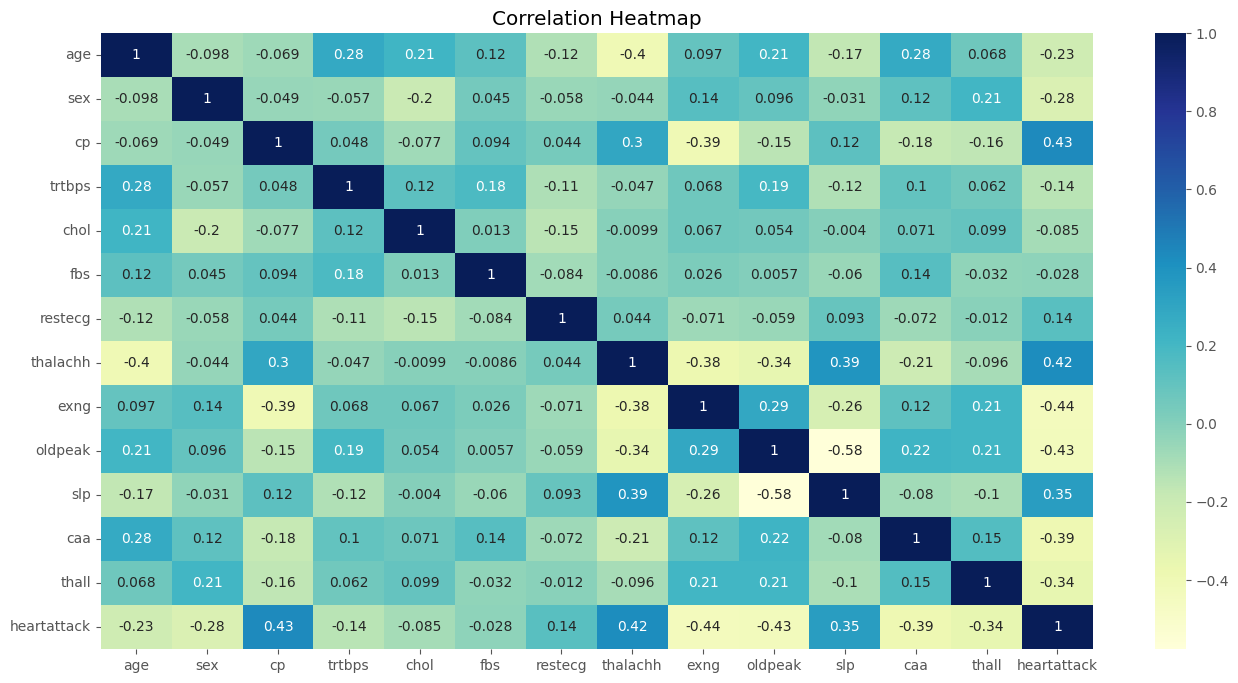

In [16]:
# 展示特征间的相关性
corr_matrix = df.corr()
plt.figure(figsize=(16, 8))
sns.heatmap(corr_matrix, cmap='YlGnBu', annot=True)
plt.title('Correlation Heatmap')
plt.show()

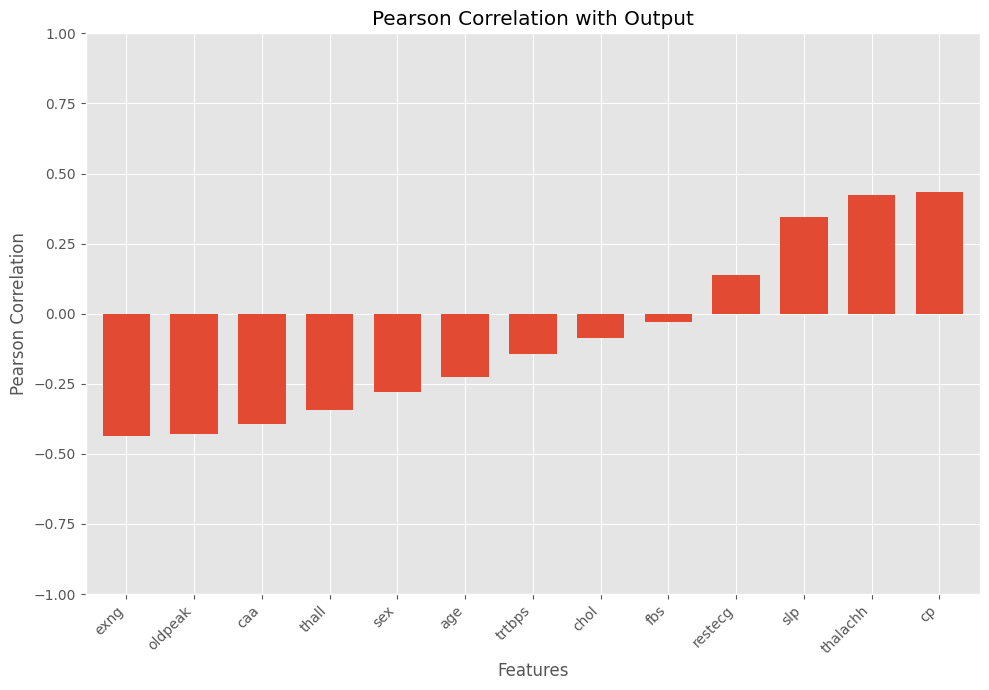

In [17]:
# 对相关性进行排序可视化
correlations = df.corr()['heartattack'][:-1].sort_values()

plt.figure(figsize=(10, 7))
ax = correlations.plot(kind='bar', width=0.7)
ax.set(ylim=[-1, 1], ylabel='Pearson Correlation', xlabel='Features', 
       title='Pearson Correlation with Output')
ax.set_xticklabels(correlations.index, rotation=45, ha='right')
plt.tight_layout()
plt.show()

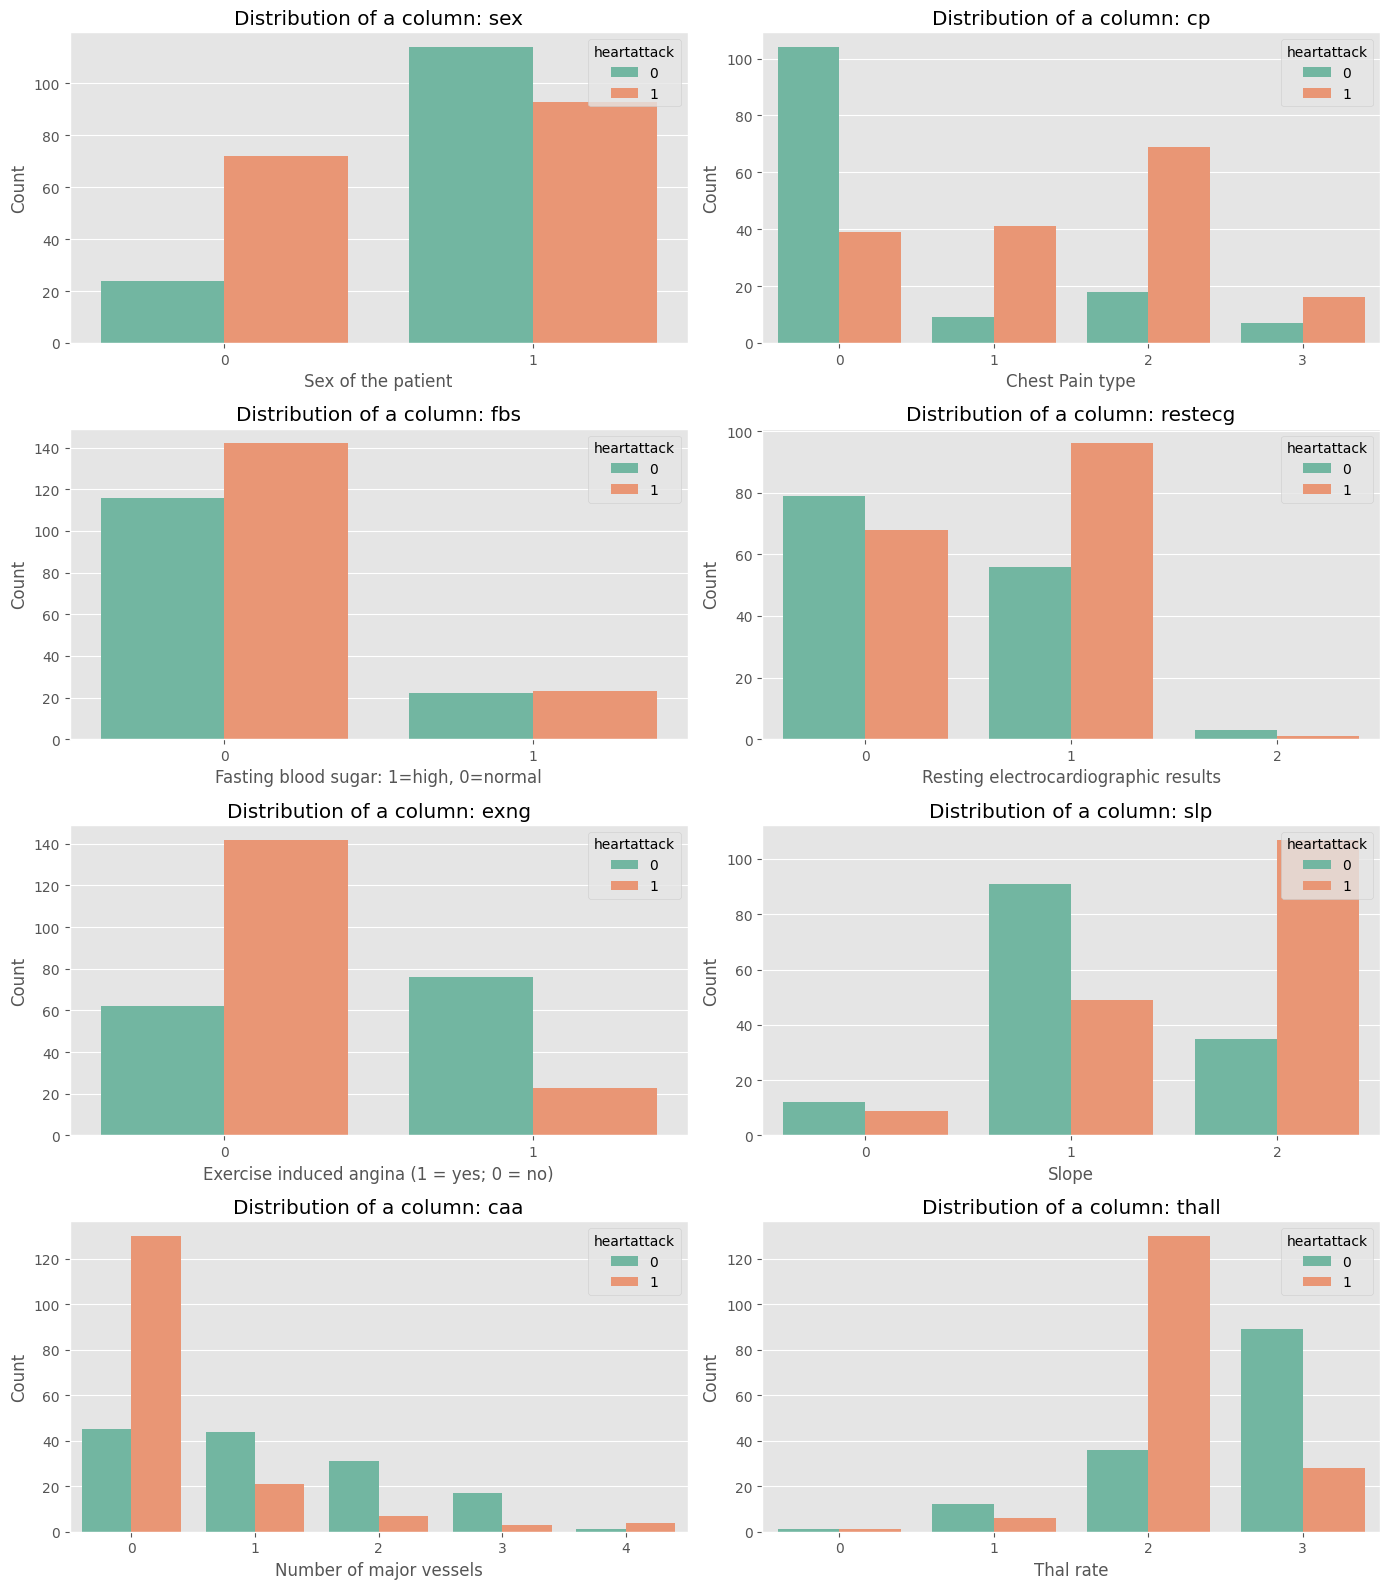

In [18]:
# 展示单特征对结果分布的影响
categ_columns = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']
labels = ['Sex of the patient', 'Chest Pain type', 'Fasting blood sugar: 1=high, 0=normal', 
          'Resting electrocardiographic results', 'Exercise induced angina (1 = yes; 0 = no)',
          'Slope', 'Number of major vessels', 'Thal rate']

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 16))
axes = axes.flatten()

for i, (column, label) in enumerate(zip(categ_columns, labels)):
    sns.countplot(data=df, x=column, hue='heartattack', ax=axes[i], palette='Set2')
    axes[i].set_xlabel(label)  
    axes[i].set_ylabel('Count')  
    axes[i].legend(title='heartattack', loc='upper right')  
    axes[i].set_title(f'Distribution of a column: {column}') 

plt.tight_layout()
plt.show()

[]

<Figure size 1500x1000 with 0 Axes>

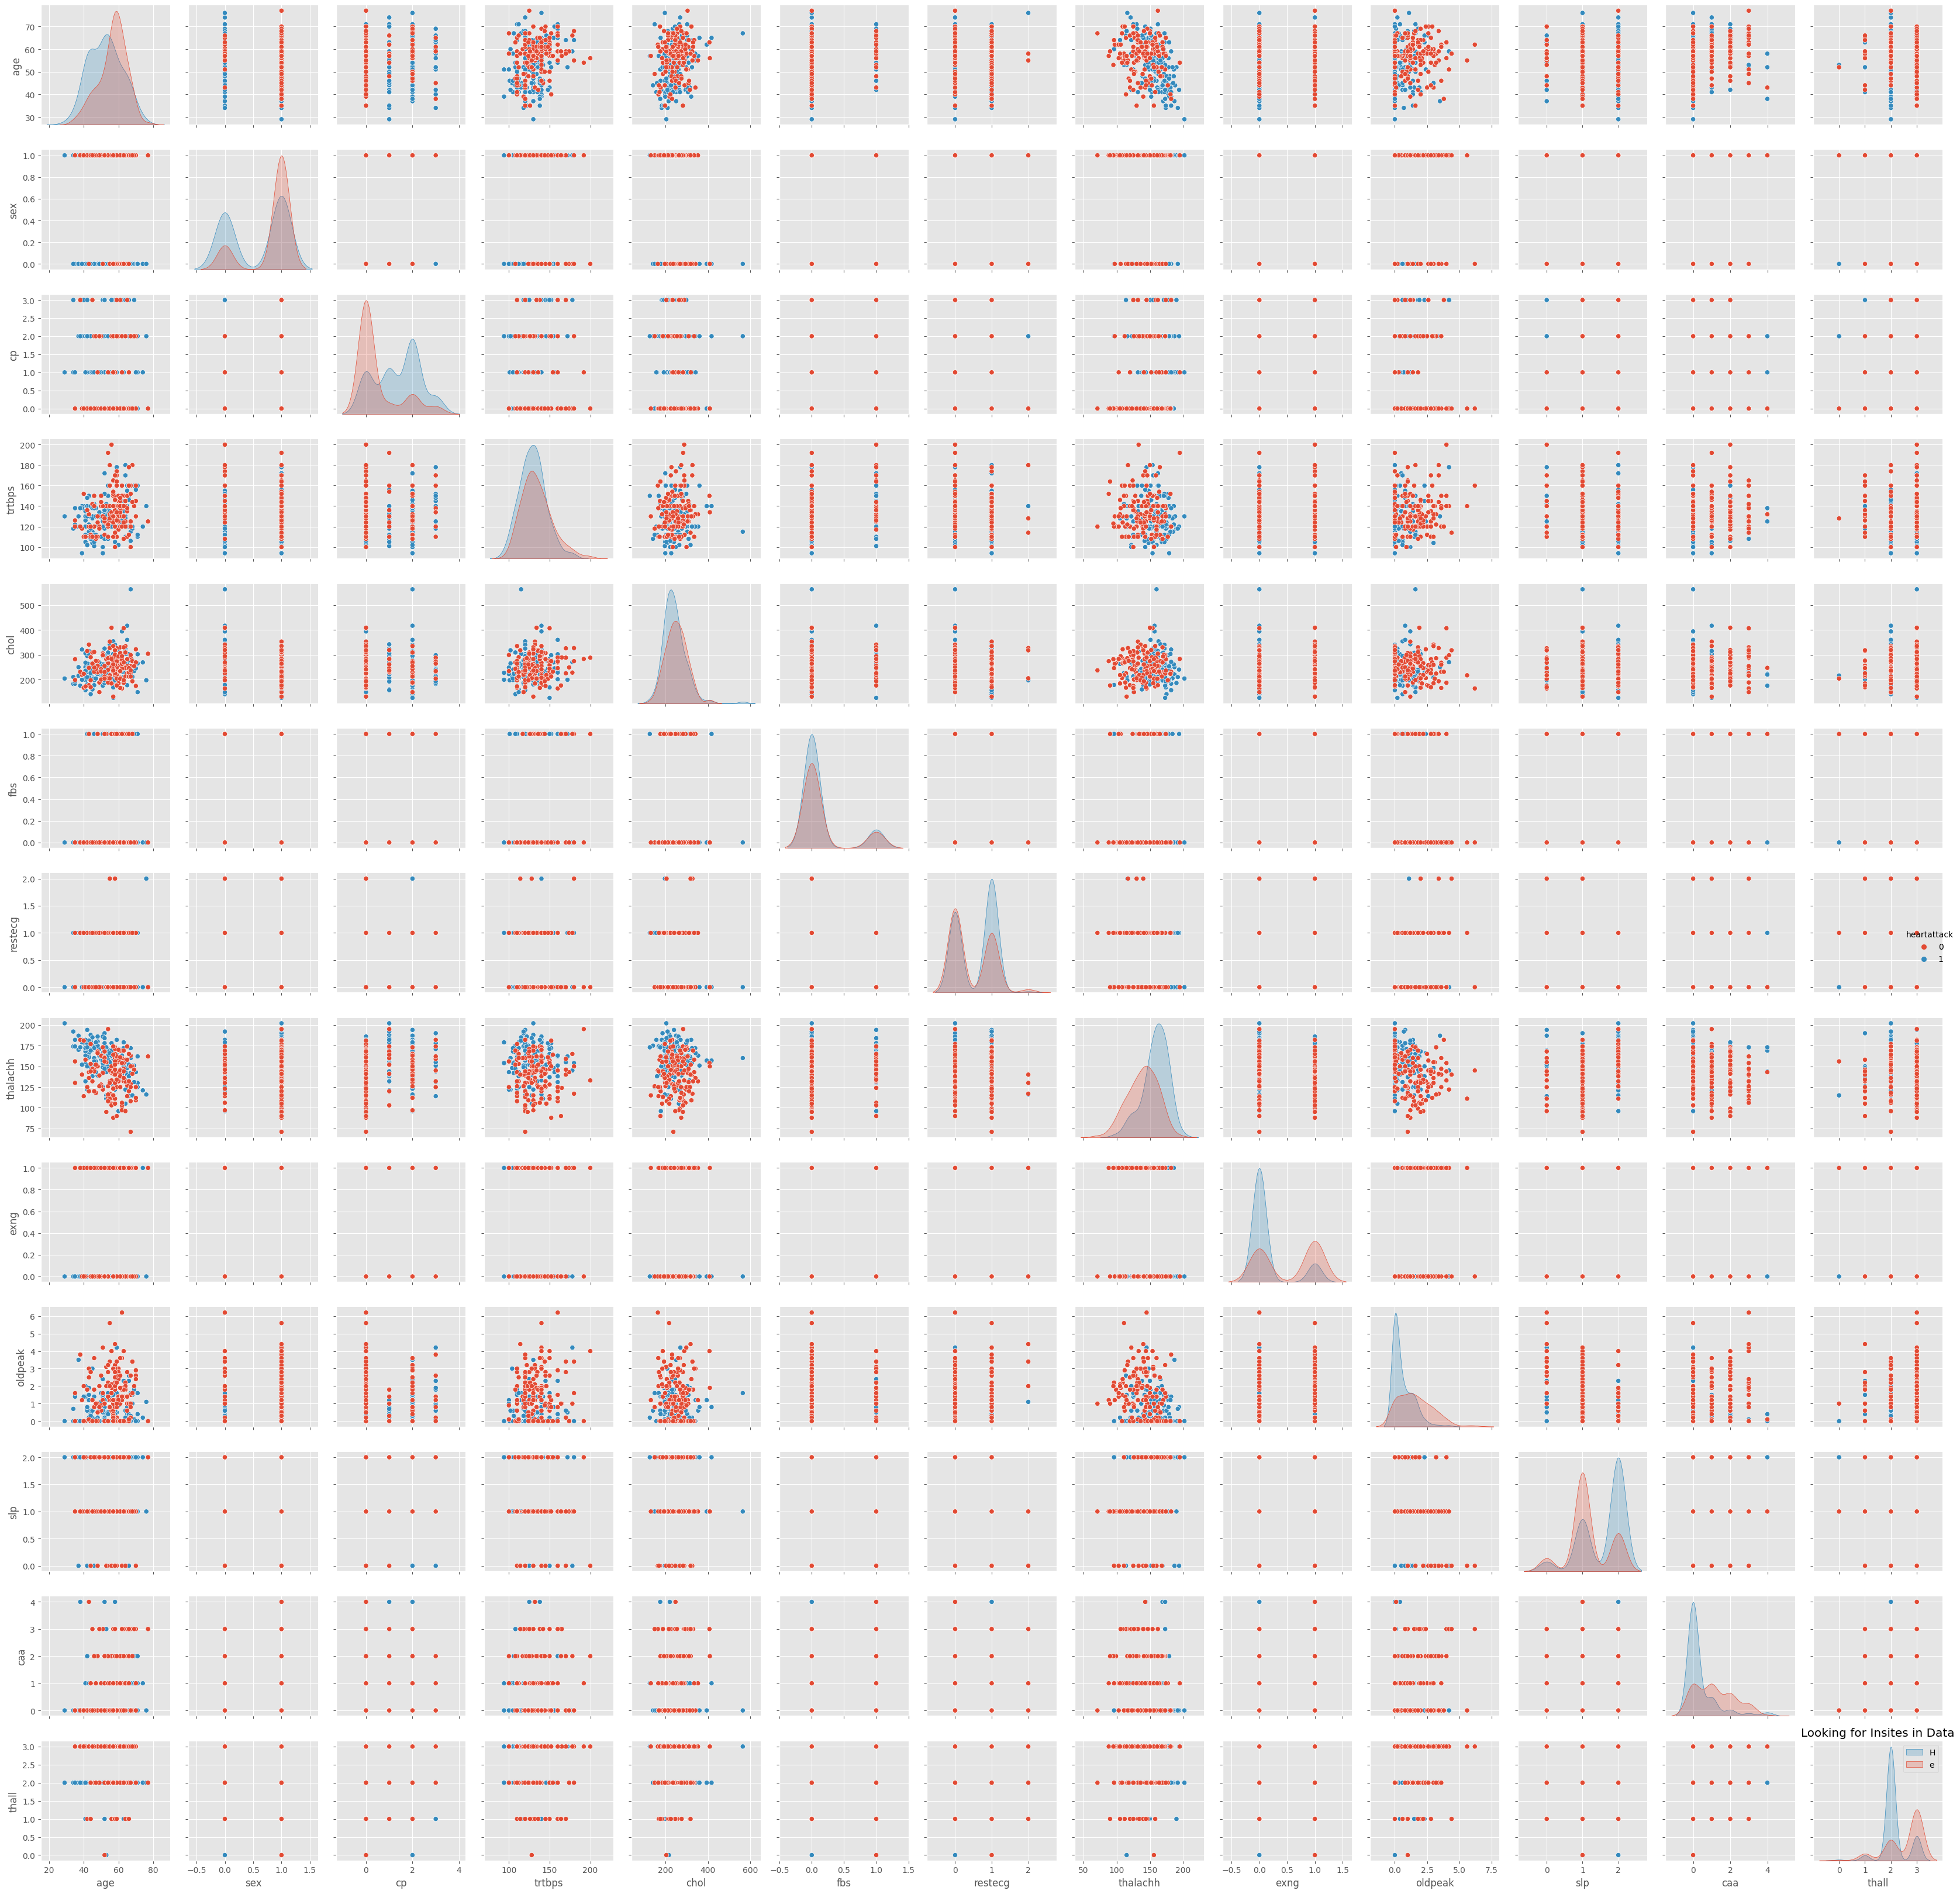

In [19]:
# 展示所有特征对对结果的分布
plt.figure(figsize=(15,10))
sns.pairplot(df,hue="heartattack")
plt.title("Looking for Insites in Data")
plt.legend("HeartDisease")
plt.tight_layout()
plt.plot()

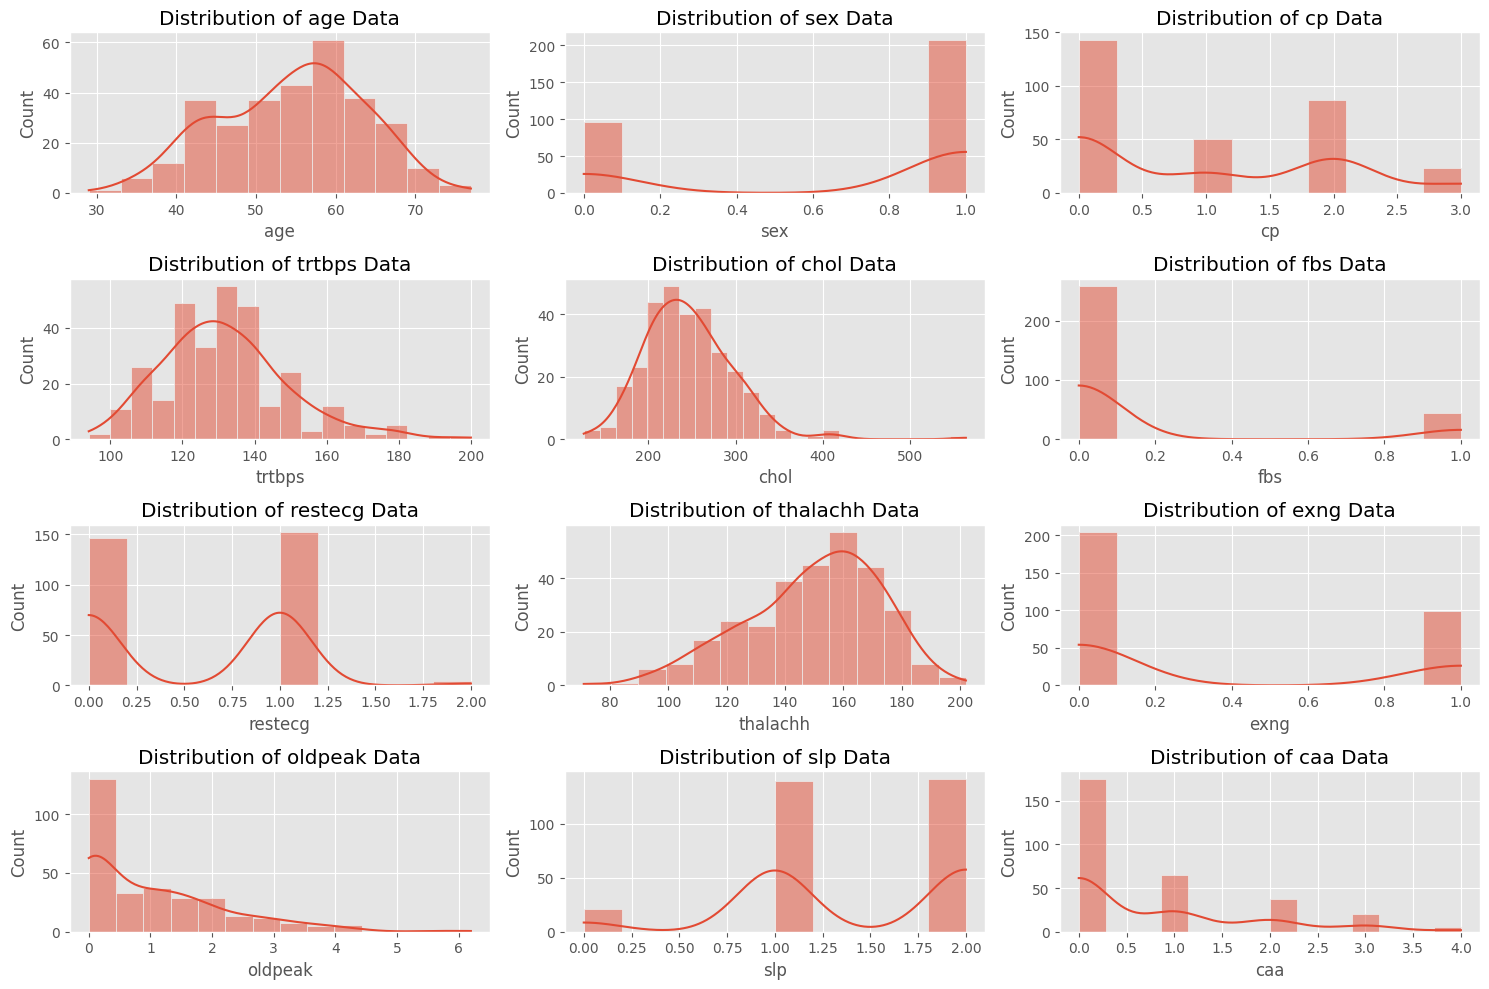

In [20]:
# 查看特征倾斜情况
plt.figure(figsize=(15,10))
for i, col in enumerate(df.columns, 1):
    if i <= 12:
        plt.subplot(4,3,i)
        plt.title(f"Distribution of {col} Data")
        sns.histplot(df[col],kde=True)
        plt.tight_layout()
        plt.plot()

In [21]:
X = df.drop('heartattack', axis=1)
y = df['heartattack']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [24]:
# 将划分后的数据集保存为csv文件
X_train.to_csv('X_train.csv', index=True)
X_test.to_csv('X_test.csv', index=True)
